In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import csv
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn import metrics
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler

% matplotlib inline

Using TensorFlow backend.
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
cleaned = pd.read_csv('cleaned_data.csv', index_col=False)

In [3]:
cleaned

,Unnamed: 0,Date,Address,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,...,14825,14826,14827,14828,14829,14830,14831,14832,14833,14834
0,0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5,2007-05-29,"1500 West Webster Avenue, Chicago, IL 60614, USA",15,W WEBSTER AVE,T045,"1500 W WEBSTER AVE, Chicago, IL",41.921600,-87.666455,8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,6,2007-05-29,"2500 West Grand Avenue, Chicago, IL 60654, USA",25,W GRAND AVE,T046,"2500 W GRAND AVE, Chicago, IL",41.891118,-87.654491,8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,7,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,8,2007-05-29,"1100 Roosevelt Road, Chicago, IL 60608, USA",11,W ROOSEVELT,T048,"1100 W ROOSEVELT, Chicago, IL",41.867108,-87.654224,8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,9,2007-05-29,"1100 West Chicago Avenue, Chicago, IL 60642, USA",11,W CHICAGO,T049,"1100 W CHICAGO, Chicago, IL",41.896282,-87.655232,8,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
cleaned.shape

(9693, 14331)

In [5]:
cleaned.dtypes

Unnamed: 0                          int64
Date                               object
Address                            object
Block                               int64
Street                             object
Trap                               object
AddressNumberAndStreet             object
Latitude                          float64
Longitude                         float64
AddressAccuracy                     int64
NumMosquitos                        int64
WnvPresent                          int64
Species_CULEX ERRATICUS             int64
Species_CULEX PIPIENS               int64
Species_CULEX PIPIENS/RESTUANS      int64
Species_CULEX RESTUANS              int64
Species_CULEX SALINARIUS            int64
Species_CULEX TARSALIS              int64
Species_CULEX TERRITANS             int64
weight_1                          float64
weight_2                          float64
Tmax                              float64
Tmin                              float64
Tavg                              

In [6]:
#os.chdir('..')

In [7]:
path = os.getcwd()
path = path + '/assets/input'
os.chdir(path)

In [8]:
ls

mapdata_copyright_openstreetmap_contributors.rds
mapdata_copyright_openstreetmap_contributors.txt
noaa_weather_qclcd_documentation.pdf
sampleSubmission.csv
spray.csv
test.csv
train.csv
weather.csv


In [9]:
train = pd.read_csv('train.csv')
spray = pd.read_csv('spray.csv')
weather = pd.read_csv('weather.csv')
test = pd.read_csv('test.csv')

In [10]:
spray.dtypes

Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

In [11]:
weather.dtypes

Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [12]:
train.dtypes

Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
NumMosquitos                int64
WnvPresent                  int64
dtype: object

In [13]:
test.dtypes

Id                          int64
Date                       object
Address                    object
Species                    object
Block                       int64
Street                     object
Trap                       object
AddressNumberAndStreet     object
Latitude                  float64
Longitude                 float64
AddressAccuracy             int64
dtype: object

In [14]:
train['Date'] = pd.to_datetime(train['Date'])

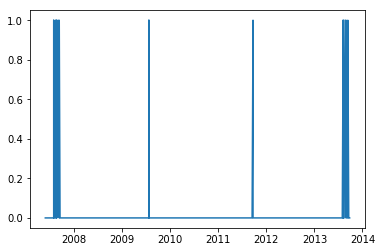

In [15]:
plt.plot(train[train['Trap']=='T002']['Date'],train[train['Trap']=='T002']['WnvPresent'])

In [16]:
spray.head(3)

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157


In [17]:
weather.head(3)

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4


In [18]:
def DataInspect(dataframe):
    '''Original function (previously called eda) created by Ritika Bhasker
       Good first step when starting any project. Provides overview of
       dataset including missing values, duplicates and types.
       Takes a Pandas dataframe as the argument.
       Modified by Michael Schillawski based on his preferences.'''
    print("Dataframe Shape:", dataframe.shape,"\n")
    print("Duplicate Rows:", dataframe.duplicated().sum(),"\n") #Added this
    print("Dataframe Types \n\n", dataframe.dtypes,"\n")    
    print("Missing Values \n\n", dataframe.isnull().sum(),"\n")
    print("Dataframe Describe \n\n", dataframe.describe(include='all'),"\n")


    print('Unique Values by Variable')
    for item in dataframe:
        print(item,':',dataframe[item].nunique())

In [19]:
DataInspect(train)

Dataframe Shape: (10506, 12) 

Duplicate Rows: 813 

Dataframe Types 

 Date                      datetime64[ns]
Address                           object
Species                           object
Block                              int64
Street                            object
Trap                              object
AddressNumberAndStreet            object
Latitude                         float64
Longitude                        float64
AddressAccuracy                    int64
NumMosquitos                       int64
WnvPresent                         int64
dtype: object 

Missing Values 

 Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64 

Dataframe Describe 

                        Date  

In [20]:
DataInspect(spray)

Dataframe Shape: (14835, 4) 

Duplicate Rows: 541 

Dataframe Types 

 Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object 

Missing Values 

 Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64 

Dataframe Describe 

               Date        Time      Latitude     Longitude
count        14835       14251  14835.000000  14835.000000
unique          10        8583           NaN           NaN
top     2013-08-15  7:44:32 PM           NaN           NaN
freq          2668         541           NaN           NaN
mean           NaN         NaN     41.904828    -87.736690
std            NaN         NaN      0.104381      0.067292
min            NaN         NaN     41.713925    -88.096468
25%            NaN         NaN     41.785001    -87.794225
50%            NaN         NaN     41.940075    -87.727853
75%            NaN         NaN     41.980978    -87.694108
max            NaN         NaN     42.395983    -87.58672

In [21]:
DataInspect(weather)

Dataframe Shape: (2944, 22) 

Duplicate Rows: 0 

Dataframe Types 

 Station          int64
Date            object
Tmax             int64
Tmin             int64
Tavg            object
Depart          object
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
Depth           object
Water1          object
SnowFall        object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object 

Missing Values 

 Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64 

Da

In [22]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import sklearn.datasets as datasets

b = datasets.load_diabetes()
X, Y = b['data'], b['target']

In [23]:
def build_tree_models(x, y, tree_depth_range=range(1,11)):
    tree_model_ypreds = {}
    
    for i in tree_depth_range:
        model = DecisionTreeRegressor(max_depth=i)
        model.fit(x[:, np.newaxis], y)
        tree_model_ypreds[i] = model.predict(x[:, np.newaxis])
        
    return tree_model_ypreds

# A function to iterate through our data dictionary of different functions and build the tree models:

def fit_trees(data_dict):
    trees_dict = {}
    x = data_dict['x']
    for label, ys in data_dict.items():
        if not label == 'x':
            tree_ys = build_tree_models(x, ys)
            trees_dict[label] = tree_ys
    
    return trees_dict

tr = fit_trees(d)
    

NameError: name 'd' is not defined

In [24]:
def tree_plotter(d, tr, label, treenum):
    fig = plt.figure(figsize=(9, 7))
        
    x = d['x']
    y_true = d[label]
    y_pred = tr[label][treenum]
    
    ax = sns.regplot(x=x, y=y_true, scatter_kws={'s':70}, fit_reg=False, x_ci=None, ci=None)
    
    ax.plot(x, y_pred, c="#D7B734", linewidth=5)
    
    ax.set_title('Tree depth: '+str(treenum)+'\n', fontsize=20)
    ax.set_xlabel('X from 0.1 to 10', fontsize = 14)
    ax.set_ylabel('f(X)' , fontsize = 14)
    
    plt.show()
    

# Widget inputs code:

def tree_plot_vars(function='sq_x', treenum=1):
    tree_plotter(d, tr, function, treenum)
    

In [25]:
def get_weather_data():
    weather_dic = {}
    fi = csv.reader(open("../input/weather.csv"))
    weather_head = fi.__next__()
    for line in fi:
        if line[0] == '1':
            continue
        weather_dic[line[1]] = line
    weather_indexes = dict([(weather_head[i], i) for i in range(len(weather_head))])
    return weather_dic, weather_indexes

def process_line(line, indexes, weather_dic, weather_indexes):
    def get(name):
        return line[indexes[name]]

    date = get("Date")
    month = float(date.split('-')[1])
    week = int(date.split('-')[1]) * 4 + int(date.split('-')[2]) / 7
    latitude = float(get("Latitude"))
    longitude = float(get("Longitude"))
    tmax = float(weather_dic[date][weather_indexes["Tmax"]])
    tmin = float(weather_dic[date][weather_indexes["Tmin"]])
    tavg = float(weather_dic[date][weather_indexes["Tavg"]])
    dewpoint = float(weather_dic[date][weather_indexes["DewPoint"]])
    wetbulb = float(weather_dic[date][weather_indexes["WetBulb"]])
    pressure = float(weather_dic[date][weather_indexes["StnPressure"]])

    return [month, week, latitude, longitude, tmax, tmin, tavg, dewpoint, wetbulb, pressure]

def preprocess_data(X, scaler=None):
    if not scaler:
        scaler = StandardScaler()
        scaler.fit(X)
    X = scaler.transform(X)
    return X, scaler

def shuffle(X, y, seed=1337):
    np.random.seed(seed)
    shuffle = np.arange(len(y))
    np.random.shuffle(shuffle)
    X = X[shuffle]
    y = y[shuffle]
    return X, y

def build_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(32, input_dim=input_dim))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(32))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(output_dim))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer="adadelta")
    return model


# now the actual script

print("Processing training data...")

rows = []
labels = []
fi = csv.reader(open("../input/train.csv"))
head = fi.__next__()
indexes = dict([(head[i], i) for i in range(len(head))])
weather_dic, weather_indexes = get_weather_data()
for line in fi:
    rows.append(process_line(line, indexes, weather_dic, weather_indexes))
    labels.append(float(line[indexes["WnvPresent"]]))

X = np.array(rows)
y = np.array(labels)

X, y = shuffle(X, y)
X, scaler = preprocess_data(X)
Y = np_utils.to_categorical(y)

input_dim = X.shape[1]
output_dim = 2

print("Validation...")

nb_folds = 4
kfolds = KFold(len(y), nb_folds)
av_roc = 0.
f = 0
for train, valid in kfolds:
    print('---'*20)
    print('Fold', f)
    print('---'*20)
    f += 1
    X_train = X[train]
    X_valid = X[valid]
    Y_train = Y[train]
    Y_valid = Y[valid]
    y_valid = y[valid]

    print("Building model...")
    model = build_model(input_dim, output_dim)

    print("Training model...")

    model.fit(X_train, Y_train, nb_epoch=100, batch_size=16, validation_data=(X_valid, Y_valid), verbose=0)
    valid_preds = model.predict_proba(X_valid, verbose=0)
    valid_preds = valid_preds[:, 1]
    roc = metrics.roc_auc_score(y_valid, valid_preds)
    print("ROC:", roc)
    av_roc += roc

print('Average ROC:', av_roc/nb_folds)

print("Generating submission...")

model = build_model(input_dim, output_dim)
model.fit(X, Y, nb_epoch=100, batch_size=16, verbose=0)

fi = csv.reader(open("../input/test.csv"))
head = fi.__next__()
indexes = dict([(head[i], i) for i in range(len(head))])
rows = []
ids = []
for line in fi:
    rows.append(process_line(line, indexes, weather_dic, weather_indexes))
    ids.append(line[0])
X_test = np.array(rows)
X_test, _ = preprocess_data(X_test, scaler)

preds = model.predict_proba(X_test, verbose=0)

fo = csv.writer(open("keras-nn.csv", "w"), lineterminator="\n")
fo.writerow(["Id","WnvPresent"])

for i, item in enumerate(ids):
    fo.writerow([ids[i], preds[i][1]])

Processing training data...
Validation...
------------------------------------------------------------
Fold 0
------------------------------------------------------------
Building model...
Training model...


/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ROC: 0.7969722645395776
------------------------------------------------------------
Fold 1
------------------------------------------------------------
Building model...
Training model...
ROC: 0.802916971686306
------------------------------------------------------------
Fold 2
------------------------------------------------------------
Building model...
Training model...
ROC: 0.8054512902668245
------------------------------------------------------------
Fold 3
------------------------------------------------------------
Building model...
Training model...
ROC: 0.7670045954222917
Average ROC: 0.79308628047875
Generating submission...


In [26]:
"""
Beating the Benchmark
West Nile Virus Prediction @ Kaggle
__author__ : Abhihsek
"""

import pandas as pd
import numpy as np
from sklearn import ensemble, preprocessing

# Load dataset 
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')
sample = pd.read_csv('../input/sampleSubmission.csv')
weather = pd.read_csv('../input/weather.csv')

# Get labels
labels = train.WnvPresent.values

# Not using codesum for this benchmark
weather = weather.drop('CodeSum', axis=1)

# Split station 1 and 2 and join horizontally
weather_stn1 = weather[weather['Station']==1]
weather_stn2 = weather[weather['Station']==2]
weather_stn1 = weather_stn1.drop('Station', axis=1)
weather_stn2 = weather_stn2.drop('Station', axis=1)
weather = weather_stn1.merge(weather_stn2, on='Date')

# replace some missing values and T with -1
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

# Functions to extract month and day from dataset
# You can also use parse_dates of Pandas.
def create_month(x):
    return x.split('-')[1]

def create_day(x):
    return x.split('-')[2]

train['month'] = train.Date.apply(create_month)
train['day'] = train.Date.apply(create_day)
test['month'] = test.Date.apply(create_month)
test['day'] = test.Date.apply(create_day)

# Add integer latitude/longitude columns
train['Lat_int'] = train.Latitude.apply(int)
train['Long_int'] = train.Longitude.apply(int)
test['Lat_int'] = test.Latitude.apply(int)
test['Long_int'] = test.Longitude.apply(int)

# drop address columns
train = train.drop(['Address', 'AddressNumberAndStreet','WnvPresent', 'NumMosquitos'], axis = 1)
test = test.drop(['Id', 'Address', 'AddressNumberAndStreet'], axis = 1)

# Merge with weather data
train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')
train = train.drop(['Date'], axis = 1)
test = test.drop(['Date'], axis = 1)

# Convert categorical data to numbers
lbl = preprocessing.LabelEncoder()
lbl.fit(list(train['Species'].values) + list(test['Species'].values))
train['Species'] = lbl.transform(train['Species'].values)
test['Species'] = lbl.transform(test['Species'].values)

lbl.fit(list(train['Street'].values) + list(test['Street'].values))
train['Street'] = lbl.transform(train['Street'].values)
test['Street'] = lbl.transform(test['Street'].values)

lbl.fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = lbl.transform(train['Trap'].values)
test['Trap'] = lbl.transform(test['Trap'].values)

# drop columns with -1s
train = train.ix[:,(train != -1).any(axis=0)]
test = test.ix[:,(test != -1).any(axis=0)]

# Random Forest Classifier 
clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=1)
clf.fit(train, labels)

# create predictions and submission file
predictions = clf.predict_proba(test)[:,1]
sample['WnvPresent'] = predictions
sample.to_csv('beat_the_benchmark.csv', index=False)


/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:81: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py:82: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/runpy.py in _run_module_as_main(mod_name='ipykernel.__main__', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/runpy.py in _run_code(code=<code object <module> at 0x101a4e540, file "/Use...3.6/site-packages/ipykernel/__main__.py", line 1>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/kennethyale/anaconda3/envs/tensorflow/lib...ges/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/kenne.../python3.6/site-packages/ipykernel/kernelapp.py'>}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), pkg_name='ipykernel', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x101a4e540, file "/Use...3.6/site-packages/ipykernel/__main__.py", line 1>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': '/Users/kennethyale/anaconda3/envs/tensorflow/lib...ges/ipykernel/__pycache__/__main__.cpython-36.pyc', '__doc__': None, '__file__': '/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': 'ipykernel', '__spec__': ModuleSpec(name='ipykernel.__main__', loader=<_f...b/python3.6/site-packages/ipykernel/__main__.py'), 'app': <module 'ipykernel.kernelapp' from '/Users/kenne.../python3.6/site-packages/ipykernel/kernelapp.py'>}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/__main__.py in <module>()
      1 if __name__ == '__main__':
      2     from ipykernel import kernelapp as app
----> 3     app.launch_new_instance()

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/traitlets/config/application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tornado/stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': '"""\nBeating the Benchmark\nWest Nile Virus Predic...le.to_csv(\'beat_the_benchmark.csv\', index=False)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 5, 21, 8, 50, 449321, tzinfo=tzutc()), 'msg_id': 'FAABEDE7DE2C4464BA44FFE23631D58D', 'msg_type': 'execute_request', 'session': '4C5D00D9089C4318856A61C2FD6A1AC9', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'FAABEDE7DE2C4464BA44FFE23631D58D', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'4C5D00D9089C4318856A61C2FD6A1AC9']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': '"""\nBeating the Benchmark\nWest Nile Virus Predic...le.to_csv(\'beat_the_benchmark.csv\', index=False)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 5, 21, 8, 50, 449321, tzinfo=tzutc()), 'msg_id': 'FAABEDE7DE2C4464BA44FFE23631D58D', 'msg_type': 'execute_request', 'session': '4C5D00D9089C4318856A61C2FD6A1AC9', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'FAABEDE7DE2C4464BA44FFE23631D58D', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'4C5D00D9089C4318856A61C2FD6A1AC9'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': '"""\nBeating the Benchmark\nWest Nile Virus Predic...le.to_csv(\'beat_the_benchmark.csv\', index=False)\n', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 3, 5, 21, 8, 50, 449321, tzinfo=tzutc()), 'msg_id': 'FAABEDE7DE2C4464BA44FFE23631D58D', 'msg_type': 'execute_request', 'session': '4C5D00D9089C4318856A61C2FD6A1AC9', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': 'FAABEDE7DE2C4464BA44FFE23631D58D', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='"""\nBeating the Benchmark\nWest Nile Virus Predic...le.to_csv(\'beat_the_benchmark.csv\', index=False)\n', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = '"""\nBeating the Benchmark\nWest Nile Virus Predic...le.to_csv(\'beat_the_benchmark.csv\', index=False)\n'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/ipykernel/zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('"""\nBeating the Benchmark\nWest Nile Virus Predic...le.to_csv(\'beat_the_benchmark.csv\', index=False)\n',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('"""\nBeating the Benchmark\nWest Nile Virus Predic...le.to_csv(\'beat_the_benchmark.csv\', index=False)\n',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='"""\nBeating the Benchmark\nWest Nile Virus Predic...le.to_csv(\'beat_the_benchmark.csv\', index=False)\n', store_history=True, silent=False, shell_futures=True)
   2723                 self.displayhook.exec_result = result
   2724 
   2725                 # Execute the user code
   2726                 interactivity = "none" if silent else self.ast_node_interactivity
   2727                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2728                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2729                 
   2730                 self.last_execution_succeeded = not has_raised
   2731                 self.last_execution_result = result
   2732 

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>, <_ast.Import object>, <_ast.Import object>, <_ast.ImportFrom object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, ...], cell_name='<ipython-input-26-026f4cd0dea4>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 1a22046668, execution..._before_exec=None error_in_exec=None result=None>)
   2845 
   2846         try:
   2847             for i, node in enumerate(to_run_exec):
   2848                 mod = ast.Module([node])
   2849                 code = compiler(mod, cell_name, "exec")
-> 2850                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x1a1600dd20, file "<ipython-input-26-026f4cd0dea4>", line 86>
        result = <ExecutionResult object at 1a22046668, execution..._before_exec=None error_in_exec=None result=None>
   2851                     return True
   2852 
   2853             for i, node in enumerate(to_run_interactive):
   2854                 mod = ast.Interactive([node])

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/IPython/core/interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x1a1600dd20, file "<ipython-input-26-026f4cd0dea4>", line 86>, result=<ExecutionResult object at 1a22046668, execution..._before_exec=None error_in_exec=None result=None>)
   2905         outflag = True  # happens in more places, so it's easier as default
   2906         try:
   2907             try:
   2908                 self.hooks.pre_run_code_hook()
   2909                 #rprint('Running code', repr(code_obj)) # dbg
-> 2910                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x1a1600dd20, file "<ipython-input-26-026f4cd0dea4>", line 86>
        self.user_global_ns = {'Activation': <class 'keras.layers.core.Activation'>, 'DataInspect': <function DataInspect>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'Dense': <class 'keras.layers.core.Dense'>, 'Dropout': <class 'keras.layers.core.Dropout'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport ma..._ipython().run_line_magic('matplotlib', 'inline')", "cleaned = pd.read_csv('cleaned_data.csv', index_col=False)", 'cleaned', 'cleaned.shape', 'cleaned.dtypes', "#os.chdir('..')", "path = os.getcwd()\npath = path + '/assets/input'\nos.chdir(path)", "get_ipython().run_line_magic('ls', '')", "train = pd.read_csv('train.csv')\nspray = pd.read...csv('weather.csv')\ntest = pd.read_csv('test.csv')", 'spray.dtypes', 'weather.dtypes', 'train.dtypes', 'test.dtypes', "train['Date'] = pd.to_datetime(train['Date'])", "plt.plot(train[train['Trap']=='T002']['Date'],train[train['Trap']=='T002']['WnvPresent'])", 'spray.head(3)', 'weather.head(3)', "def DataInspect(dataframe):\n    '''Original func...        print(item,':',dataframe[item].nunique())", 'DataInspect(train)', ...], 'KFold': <class 'sklearn.cross_validation.KFold'>, 'Out': {3:       Unnamed: 0        Date  \
0              0...2  
9692  6.243555  

[9693 rows x 14331 columns], 4: (9693, 14331), 5: Unnamed: 0                          int64
Date  ...             float64
Length: 14331, dtype: object, 10: Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object, 11: Station          int64
Date            object
Tm...       int64
AvgSpeed        object
dtype: object, 12: Date                       object
Address       ...4
WnvPresent                  int64
dtype: object, 13: Id                          int64
Date          ...4
AddressAccuracy             int64
dtype: object, 15: [<matplotlib.lines.Line2D object>], 16:          Date        Time   Latitude  Longitude
...3
2  2011-08-29  6:57:18 PM  42.391022 -88.089157, 17:    Station        Date  Tmax  Tmin Tavg Depart  ...13.0         4      13.4  

[3 rows x 22 columns]}, 'Sequential': <class 'keras.models.Sequential'>, ...}
        self.user_ns = {'Activation': <class 'keras.layers.core.Activation'>, 'DataInspect': <function DataInspect>, 'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'DecisionTreeRegressor': <class 'sklearn.tree.tree.DecisionTreeRegressor'>, 'Dense': <class 'keras.layers.core.Dense'>, 'Dropout': <class 'keras.layers.core.Dropout'>, 'In': ['', "import numpy as np\nimport pandas as pd\nimport ma..._ipython().run_line_magic('matplotlib', 'inline')", "cleaned = pd.read_csv('cleaned_data.csv', index_col=False)", 'cleaned', 'cleaned.shape', 'cleaned.dtypes', "#os.chdir('..')", "path = os.getcwd()\npath = path + '/assets/input'\nos.chdir(path)", "get_ipython().run_line_magic('ls', '')", "train = pd.read_csv('train.csv')\nspray = pd.read...csv('weather.csv')\ntest = pd.read_csv('test.csv')", 'spray.dtypes', 'weather.dtypes', 'train.dtypes', 'test.dtypes', "train['Date'] = pd.to_datetime(train['Date'])", "plt.plot(train[train['Trap']=='T002']['Date'],train[train['Trap']=='T002']['WnvPresent'])", 'spray.head(3)', 'weather.head(3)', "def DataInspect(dataframe):\n    '''Original func...        print(item,':',dataframe[item].nunique())", 'DataInspect(train)', ...], 'KFold': <class 'sklearn.cross_validation.KFold'>, 'Out': {3:       Unnamed: 0        Date  \
0              0...2  
9692  6.243555  

[9693 rows x 14331 columns], 4: (9693, 14331), 5: Unnamed: 0                          int64
Date  ...             float64
Length: 14331, dtype: object, 10: Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object, 11: Station          int64
Date            object
Tm...       int64
AvgSpeed        object
dtype: object, 12: Date                       object
Address       ...4
WnvPresent                  int64
dtype: object, 13: Id                          int64
Date          ...4
AddressAccuracy             int64
dtype: object, 15: [<matplotlib.lines.Line2D object>], 16:          Date        Time   Latitude  Longitude
...3
2  2011-08-29  6:57:18 PM  42.391022 -88.089157, 17:    Station        Date  Tmax  Tmin Tavg Depart  ...13.0         4      13.4  

[3 rows x 22 columns]}, 'Sequential': <class 'keras.models.Sequential'>, ...}
   2911             finally:
   2912                 # Reset our crash handler in place
   2913                 sys.excepthook = old_excepthook
   2914         except SystemExit as e:

...........................................................................
/Users/kennethyale/Desktop/ga_class_repos/west_nile_virus/assets/input/<ipython-input-26-026f4cd0dea4> in <module>()
     81 train = train.ix[:,(train != -1).any(axis=0)]
     82 test = test.ix[:,(test != -1).any(axis=0)]
     83 
     84 # Random Forest Classifier 
     85 clf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=1)
---> 86 clf.fit(train, labels)
     87 
     88 # create predictions and submission file
     89 predictions = clf.predict_proba(test)[:,1]
     90 sample['WnvPresent'] = predictions

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[  2. ,  41. ,  36. , ...,   5.8,  16. , ...106. , ...,   4.1,   9. ,   4.6]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=None)
    323             trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
    324                              backend="threading")(
    325                 delayed(_parallel_build_trees)(
    326                     t, self, X, y, sample_weight, i, len(trees),
    327                     verbose=self.verbose, class_weight=self.class_weight)
--> 328                 for i, t in enumerate(trees))
        i = 999
    329 
    330             # Collect newly grown trees
    331             self.estimators_.extend(trees)
    332 

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseForest.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Mar  5 16:08:53 2018
PID: 67289Python 3.6.4: /Users/kennethyale/anaconda3/envs/tensorflow/bin/python
...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _parallel_build_trees>, (DecisionTreeClassifier(class_weight=None, criter...        random_state=1670008176, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[  2. ,  41. ,  36. , ...,   5.8,  16. , ...106. , ...,   4.1,   9. ,   4.6]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), None, 0, 1000), {'class_weight': None, 'verbose': 0})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _parallel_build_trees>
        args = (DecisionTreeClassifier(class_weight=None, criter...        random_state=1670008176, splitter='best'), RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), array([[  2. ,  41. ,  36. , ...,   5.8,  16. , ...106. , ...,   4.1,   9. ,   4.6]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), None, 0, 1000)
        kwargs = {'class_weight': None, 'verbose': 0}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/ensemble/forest.py in _parallel_build_trees(tree=DecisionTreeClassifier(class_weight=None, criter...        random_state=1670008176, splitter='best'), forest=RandomForestClassifier(bootstrap=True, class_wei...te=None, verbose=0,
            warm_start=False), X=array([[  2. ,  41. ,  36. , ...,   5.8,  16. , ...106. , ...,   4.1,   9. ,   4.6]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=None, tree_idx=0, n_trees=1000, verbose=0, class_weight=None)
    116                 warnings.simplefilter('ignore', DeprecationWarning)
    117                 curr_sample_weight *= compute_sample_weight('auto', y, indices)
    118         elif class_weight == 'balanced_subsample':
    119             curr_sample_weight *= compute_sample_weight('balanced', y, indices)
    120 
--> 121         tree.fit(X, y, sample_weight=curr_sample_weight, check_input=False)
        tree.fit = <bound method DecisionTreeClassifier.fit of Deci...       random_state=1670008176, splitter='best')>
        X = array([[  2. ,  41. ,  36. , ...,   5.8,  16. , ...106. , ...,   4.1,   9. ,   4.6]], dtype=float32)
        y = array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])
        sample_weight = None
        curr_sample_weight = array([1., 1., 1., ..., 0., 0., 1.])
    122     else:
    123         tree.fit(X, y, sample_weight=sample_weight, check_input=False)
    124 
    125     return tree

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1670008176, splitter='best'), X=array([[  2. ,  41. ,  36. , ...,   5.8,  16. , ...106. , ...,   4.1,   9. ,   4.6]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=array([1., 1., 1., ..., 0., 0., 1.]), check_input=False, X_idx_sorted=None)
    785 
    786         super(DecisionTreeClassifier, self).fit(
    787             X, y,
    788             sample_weight=sample_weight,
    789             check_input=check_input,
--> 790             X_idx_sorted=X_idx_sorted)
        X_idx_sorted = None
    791         return self
    792 
    793     def predict_proba(self, X, check_input=True):
    794         """Predict class probabilities of the input samples X.

...........................................................................
/Users/kennethyale/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/tree/tree.py in fit(self=DecisionTreeClassifier(class_weight=None, criter...        random_state=1670008176, splitter='best'), X=array([[  2. ,  41. ,  36. , ...,   5.8,  16. , ...106. , ...,   4.1,   9. ,   4.6]], dtype=float32), y=array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]]), sample_weight=array([1., 1., 1., ..., 0., 0., 1.]), check_input=False, X_idx_sorted=None)
    189         if isinstance(self.min_samples_split, (numbers.Integral, np.integer)):
    190             if not 2 <= self.min_samples_split:
    191                 raise ValueError("min_samples_split must be an integer "
    192                                  "greater than 1 or a float in (0.0, 1.0]; "
    193                                  "got the integer %s"
--> 194                                  % self.min_samples_split)
        self.min_samples_split = 1
    195             min_samples_split = self.min_samples_split
    196         else:  # float
    197             if not 0. < self.min_samples_split <= 1.:
    198                 raise ValueError("min_samples_split must be an integer "

ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1
___________________________________________________________________________